In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
from datasets import load_dataset
import io
dataset = load_dataset("HuggingFaceM4/VQAv2")

/opt/conda/lib/python3.10/site-packages/datasets/load.py:1461: FutureWarning: The repository for HuggingFaceM4/VQAv2 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/HuggingFaceM4/VQAv2
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Repo card metadata block was not found. Setting CardData to empty.


Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating testdev split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [4]:
dataset

DatasetDict({
    train: Dataset({
        features: ['question_type', 'multiple_choice_answer', 'answers', 'image_id', 'answer_type', 'question_id', 'question', 'image'],
        num_rows: 443757
    })
    validation: Dataset({
        features: ['question_type', 'multiple_choice_answer', 'answers', 'image_id', 'answer_type', 'question_id', 'question', 'image'],
        num_rows: 214354
    })
    testdev: Dataset({
        features: ['question_type', 'multiple_choice_answer', 'answers', 'image_id', 'answer_type', 'question_id', 'question', 'image'],
        num_rows: 107394
    })
    test: Dataset({
        features: ['question_type', 'multiple_choice_answer', 'answers', 'image_id', 'answer_type', 'question_id', 'question', 'image'],
        num_rows: 447793
    })
})

**Sample 25% of whole dataset**

In [5]:
from datasets import load_dataset
import random

# Load the dataset
#dataset = load_dataset("HuggingFaceM4/VQAv2")

# Get the length of the dataset
total_length = len(dataset["train"])

# Calculate the number of samples you want to keep (25% of the total length)
sample_length = int(total_length * 0.25)

# Generate a list of random indices to sample
random_indices = random.sample(range(total_length), sample_length)

# Sampled dataset
sampled_dataset = dataset["train"].select(random_indices)

# Now, 'sampled_dataset' contains 25% of the original dataset, randomly sampled


**Store the dataset into**

In [6]:
sampled_dataset

Dataset({
    features: ['question_type', 'multiple_choice_answer', 'answers', 'image_id', 'answer_type', 'question_id', 'question', 'image'],
    num_rows: 110939
})

Question: Is there any color to this room?
question_type: is there
multiple_choice_answer: no
image_id: 483058
answer_type: yes/no
question_id: 483058004
image: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=150x200 at 0x791FBD0DB310>


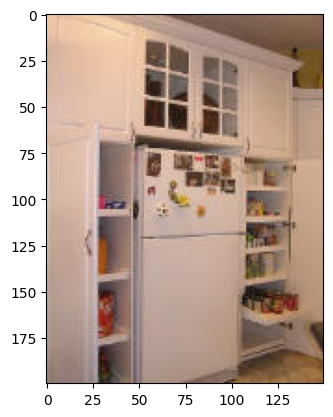

In [8]:
from PIL import Image
import matplotlib.pyplot as plt
sample = sampled_dataset[1]
PIL_image = Image.fromarray(np.array(sample['image'])).convert('RGB')
plt.imshow(sample['image'].convert('RGB'))
print("Question: {}".format(sample['question']))
print("question_type: {}".format(sample['question_type']))
print("multiple_choice_answer: {}".format(sample['multiple_choice_answer']))
print("image_id: {}".format(sample['image_id']))
print("answer_type: {}".format(sample['answer_type']))
print("question_id: {}".format(sample['question_id']))
print("image: {}".format(sample['image']))
#'question_type', 'multiple_choice_answer', 'answers', 'image_id', 'answer_type', 'question_id', 'question', 'image'

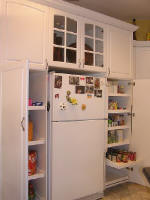

In [9]:
sampled_dataset[1]['image']

In [ ]:
# !rm -rf /kaggle/working/*

**Converting the dataset to csv dataframe**

In [ ]:
import csv
import pandas as pd
import io
# Define the field names for the CSV file
fieldnames = ['question', 'question_type', 'multiple_choice_answer', 'image_id', 'answer_type', 'question_id', 'image', 'answers']

# Open a CSV file in write mode
with open('sampled_data.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    # Write the header
    writer.writeheader()
    
    # Write each sample as a row in the CSV file
    for sample in sampled_dataset:
        # Convert PIL image to bytes
        image_bytes = io.BytesIO()
        sample['image'].save(image_bytes, format='JPEG')
        image_bytes.seek(0)  # Reset the file pointer
        
        writer.writerow({
            'question': sample['question'],
            'question_type': sample['question_type'],
            'multiple_choice_answer': sample['multiple_choice_answer'],
            'image_id': sample['image_id'],
            'answer_type': sample['answer_type'],
            'question_id': sample['question_id'],
            'image': image_bytes.read(),  # Store image data as bytes
            'answers': sample['answers']
        })

print("CSV file saved successfully.")


In [ ]:
sampled_dataset.to_csv('/kaggle/working/sampled_data.csv')